# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis
## Problem Statement
In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.
## Objective
This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.
## Research Question
A
Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

## Importing Libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [46]:
df = pd.read_csv('data.csv')

In [47]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


# Exploratory Data Analysis

In [48]:
df.shape

(6405008, 18)

In [49]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [50]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [51]:
df.isnull().sum()

VendorID                 65441
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65441
trip_distance                0
RatecodeID               65441
store_and_fwd_flag       65441
PULocationID                 0
DOLocationID                 0
payment_type             65441
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

In [52]:
(13049/len(df))*100

0.20373120533182784

In [53]:
df.dropna(inplace = True)

In [54]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339562,2.0,2020-01-31 23:38:07,2020-01-31 23:52:21,1.0,2.10,1.0,N,163,246,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
6339563,2.0,2020-01-31 23:00:18,2020-01-31 23:19:18,1.0,2.13,1.0,N,164,79,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5
6339564,2.0,2020-01-31 23:24:22,2020-01-31 23:40:39,1.0,2.55,1.0,N,79,68,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5
6339565,2.0,2020-01-31 23:44:22,2020-01-31 23:54:00,1.0,1.61,1.0,N,100,142,2.0,8.5,0.5,0.5,0.00,0.0,0.3,12.30,2.5


In [55]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60

In [56]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339562,2.0,2020-01-31 23:38:07,2020-01-31 23:52:21,1.0,2.10,1.0,N,163,246,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5,14.233333
6339563,2.0,2020-01-31 23:00:18,2020-01-31 23:19:18,1.0,2.13,1.0,N,164,79,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5,19.000000
6339564,2.0,2020-01-31 23:24:22,2020-01-31 23:40:39,1.0,2.55,1.0,N,79,68,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5,16.283333
6339565,2.0,2020-01-31 23:44:22,2020-01-31 23:54:00,1.0,1.61,1.0,N,100,142,2.0,8.5,0.5,0.5,0.00,0.0,0.3,12.30,2.5,9.633333


In [57]:
df = df[['passenger_count', 'trip_distance', 'payment_type', 'fare_amount', 'duration']]

In [58]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.20,1.0,6.0,4.800000
1,1.0,1.20,1.0,7.0,7.416667
2,1.0,0.60,1.0,6.0,6.183333
3,1.0,0.80,1.0,5.5,4.850000
4,1.0,0.00,2.0,3.5,2.300000
...,...,...,...,...,...
6339562,1.0,2.10,1.0,11.0,14.233333
6339563,1.0,2.13,1.0,13.0,19.000000
6339564,1.0,2.55,1.0,12.5,16.283333
6339565,1.0,1.61,2.0,8.5,9.633333


In [59]:
df['passenger_count'] = df['passenger_count'].astype('int64')

In [60]:
df['payment_type'] = df['payment_type'].astype('int64')

In [61]:
df[df.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,duration
2056,1,0.00,2,7.0,0.000000
2441,1,0.00,1,52.0,0.200000
2446,2,1.70,1,9.5,13.066667
2465,1,0.40,1,4.0,3.083333
3344,1,1.20,1,6.0,5.350000
...,...,...,...,...,...
6339558,1,1.63,2,8.0,8.800000
6339559,1,1.81,1,8.5,8.016667
6339560,1,0.98,2,6.5,6.900000
6339562,1,2.10,1,11.0,14.233333


In [62]:
df.drop_duplicates(inplace = True)

In [63]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,1,6.0,4.800000
1,1,1.20,1,7.0,7.416667
2,1,0.60,1,6.0,6.183333
3,1,0.80,1,5.5,4.850000
4,1,0.00,2,3.5,2.300000
...,...,...,...,...,...
6339555,3,2.09,1,10.0,14.800000
6339561,1,4.11,1,17.5,21.500000
6339563,1,2.13,1,13.0,19.000000
6339564,1,2.55,1,12.5,16.283333


In [64]:
df['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [65]:
df['payment_type'].value_counts(normalize = True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [66]:
df = df[df['payment_type']<3]

In [67]:
df = df[(df['passenger_count']>0)&(df['passenger_count']<6)]

In [68]:
df.shape

(2780283, 5)

In [69]:
df['payment_type'].replace([1, 2], ['Card', 'Cash'], inplace = True)

In [70]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,Card,6.0,4.800000
1,1,1.20,Card,7.0,7.416667
2,1,0.60,Card,6.0,6.183333
3,1,0.80,Card,5.5,4.850000
4,1,0.00,Cash,3.5,2.300000
...,...,...,...,...,...
6339555,3,2.09,Card,10.0,14.800000
6339561,1,4.11,Card,17.5,21.500000
6339563,1,2.13,Card,13.0,19.000000
6339564,1,2.55,Card,12.5,16.283333


In [71]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,4.536729e+00,1.780567e+01,2.415478e+01
std,1.176652e+00,4.895890e+00,1.506997e+01,9.260031e+01
min,1.000000e+00,-2.218000e+01,-5.000000e+02,-2.770367e+03
25%,1.000000e+00,1.500000e+00,9.000000e+00,9.883333e+00
50%,1.000000e+00,2.730000e+00,1.300000e+01,1.573333e+01
75%,2.000000e+00,5.470000e+00,2.100000e+01,2.336667e+01
max,5.000000e+00,2.628800e+02,4.265000e+03,8.525117e+03


In [72]:
df = df[df['trip_distance']>0]
df = df[df['fare_amount']>0]
df = df[df['duration']>0]

In [73]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,Card,6.0,4.800000
1,1,1.20,Card,7.0,7.416667
2,1,0.60,Card,6.0,6.183333
3,1,0.80,Card,5.5,4.850000
5,1,0.03,Cash,2.5,0.883333
...,...,...,...,...,...
6339550,4,2.40,Card,10.5,12.383333
6339555,3,2.09,Card,10.0,14.800000
6339561,1,4.11,Card,17.5,21.500000
6339563,1,2.13,Card,13.0,19.000000


In [74]:
for col in ['trip_distance', 'fare_amount','duration']:
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    IQR = q3-q1

    lower_fence = q1 - 1.5*IQR
    higher_fence = q3 + 1.5*IQR

    df = df[(df[col]>= lower_fence)&(df[col]<=higher_fence)]
    

In [75]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,Card,6.0,4.800000
1,1,1.20,Card,7.0,7.416667
2,1,0.60,Card,6.0,6.183333
3,1,0.80,Card,5.5,4.850000
5,1,0.03,Cash,2.5,0.883333
...,...,...,...,...,...
6339550,4,2.40,Card,10.5,12.383333
6339555,3,2.09,Card,10.0,14.800000
6339561,1,4.11,Card,17.5,21.500000
6339563,1,2.13,Card,13.0,19.000000


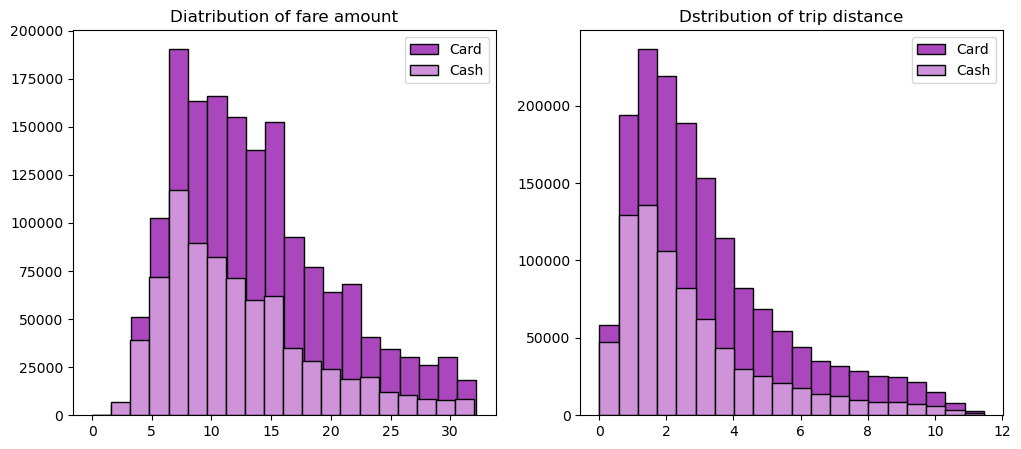

In [76]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Diatribution of fare amount')
plt.hist(df[df['payment_type']== 'Card']['fare_amount'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#AB47BC', label = 'Card')
plt.hist(df[df['payment_type']== 'Cash']['fare_amount'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#CE93D8', label = 'Cash')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Dstribution of trip distance')
plt.hist(df[df['payment_type']== 'Card']['trip_distance'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#AB47BC', label = 'Card')
plt.hist(df[df['payment_type']== 'Cash']['trip_distance'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color = '#CE93D8', label = 'Cash')
plt.legend()
plt.show()

In [77]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean', 'std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.701903  6.506356      3.230729  2.320528
Cash           12.250209  6.246104      2.803716  2.231871

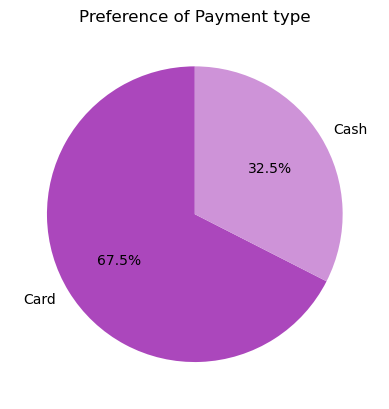

In [78]:
plt.title('Preference of Payment type')
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index, startangle = 90,
        autopct = '%1.1f%%', colors = ['#AB47BC', '#CE93D8'])
plt.show()

In [79]:
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'}, inplace = True)
passenger_count.reset_index(inplace = True)

In [80]:
passenger_count['percent'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [81]:
passenger_count

,payment_type,passenger_count,count,percent
0,Card,1,953075,40.075174
1,Card,2,336560,14.151772
2,Card,3,124662,5.241824
3,Card,4,64752,2.722711
4,Card,5,126283,5.309984
5,Cash,1,476475,20.034959
6,Cash,2,159243,6.695896
7,Cash,3,55491,2.333302
8,Cash,4,33208,1.396340
9,Cash,5,48469,2.038039


In [83]:
df2 = pd.DataFrame(columns = ['payment_type', 1, 2, 3, 4, 5])
df2['payment_type'] = ['Card', 'Cash']
df2.iloc[0,1:] = passenger_count.iloc[0:5, -1]
df2.iloc[1,1:] = passenger_count.iloc[5:, -1]

In [84]:
df2

,payment_type,1,2,3,4,5
0,Card,40.075174,14.151772,5.241824,2.722711,5.309984
1,Cash,20.034959,6.695896,2.333302,1.39634,2.038039


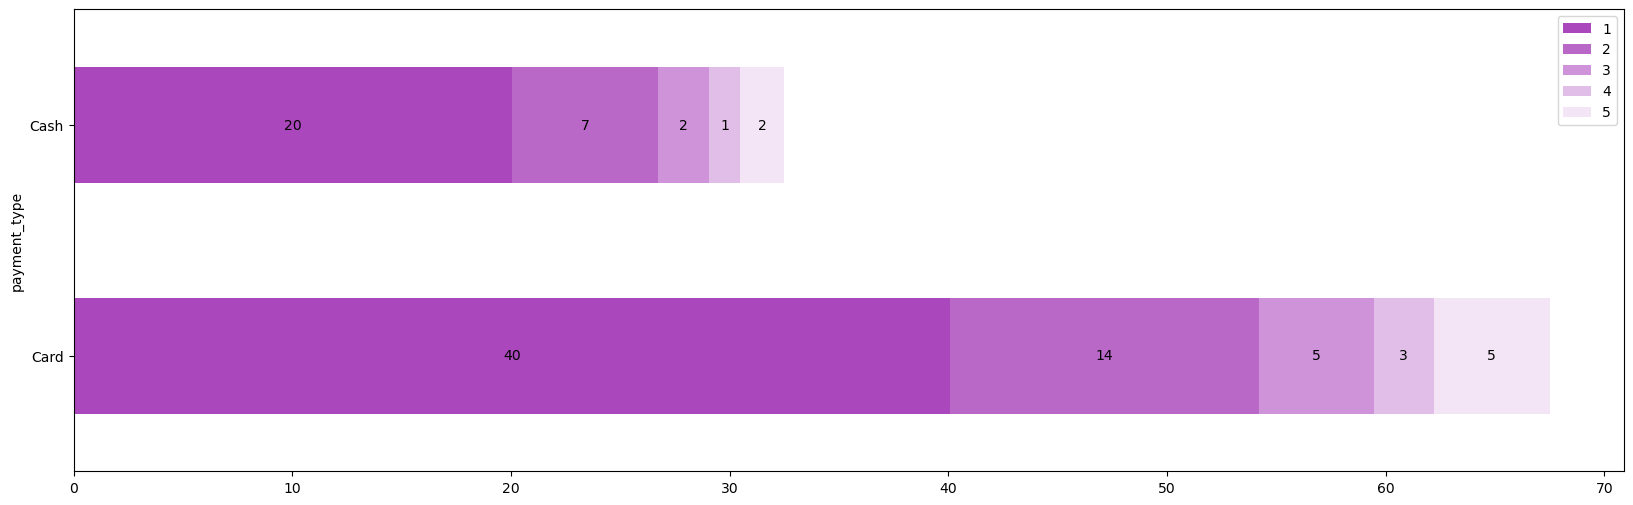

In [85]:
fig, ax = plt.subplots(figsize = (20, 6))
df2.plot(x = 'payment_type', kind = 'barh', stacked = True, ax = ax, color = ['#AB47BC', '#BA68C8', '#CE93D8', '#E1BEE7', '#F3E5F5'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}'.format(width),
            horizontalalignment='center',
            verticalalignment='center')


## Hypothesis Testing

<b>Null Hypothesis</b>: There is no difference in average fare between Customers who use Credit Card and Customers who use Cash.

<b>Alternate Hypothesis</b>: There is a difference in average fare between Customesr who use Credit Card and Customers who use Cash.


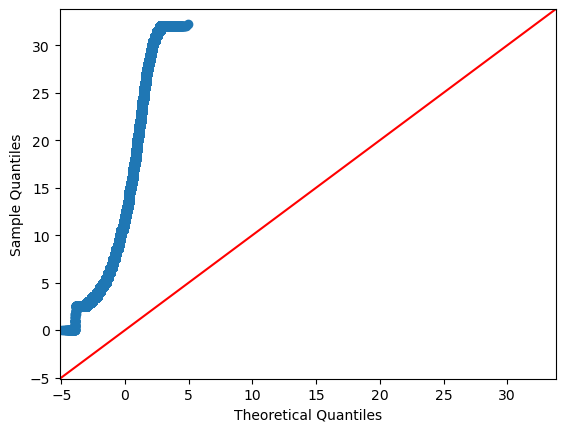

In [87]:
sm.qqplot(df['fare_amount'], line = '45')
plt.show()
## it is not a normalized data. 

In [88]:
card_sample = df[df['payment_type']=='Card']['fare_amount']
cash_sample = df[df['payment_type']=='Cash']['fare_amount']

In [91]:
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)
print(f"t_statistics: {t_stats}")
print(f"p_value: {p_value}")

### so, the p value is so small that we fail to accept the null hypothesis

t_statistics: 165.59915491544626
p_value: 0.0
